In [33]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [34]:
# Custom Health Dataset

health_data = np.array([
    [22, 19, 3, 0],
    [25, 18, 2, 0],
    [28, 21, 2, 0],
    [30, 20, 3, 0],
    [32, 23, 1.5, 0],
    [28, 22, 1, 0],
    [38, 25, 2, 1],
    [40, 26, 1, 1],
    [42, 27, 1.2, 1],
    [45, 28, 0.5, 1],
    [48, 29, 1, 1],
    [50, 30, 1, 1],
    [55, 31, 0.8, 1],
    [58, 31, 0.5, 2],
    [60, 32, 0.5, 2],
    [62, 33, 0.3, 2],
    [65, 35, 0, 2],
    [68, 34, 0.2, 2],
    [70, 36, 0, 2],
    [72, 37, 0, 2],
])


In [35]:
# Split features & labels
X = health_data[:, :3]
y = health_data[:, 3]


In [36]:
# Normalize features (Min-Max scaling)
X_min, X_max = np.min(X, axis=0), np.max(X, axis=0)
X = (X - X_min) / (X_max - X_min)

In [37]:
 # Neural Network Class

class HealthNN:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, lr):
        self.lr = lr
        self.W1 = np.random.randn(input_nodes, hidden_nodes) * 0.01
        self.W2 = np.random.randn(hidden_nodes, output_nodes) * 0.01

    def sigmoid(self, z, derivative=False):
        if derivative:
            return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def feedForward(self, X):
        X = np.array(X)  # make sure input is numpy array
        if X.ndim == 1:
            X = X.reshape(1, -1)
        self.h_in = np.dot(X, self.W1)
        self.h_out = self.sigmoid(self.h_in)
        self.o_in = np.dot(self.h_out, self.W2)
        self.out = self.sigmoid(self.o_in)
        return self.out

    def backward(self, X, Y, y_pred):
        error = Y - y_pred
        d_out = self.lr * error * self.sigmoid(y_pred, derivative=True)

        hidden_err = d_out.dot(self.W2.T)
        d_hidden = self.lr * hidden_err * self.sigmoid(self.h_out, derivative=True)

        self.W2 += self.h_out.T.dot(d_out)
        self.W1 += X.T.dot(d_hidden)

    def train(self, X, y, epochs):
        loss_history = []
        # Convert labels to one-hot
        Y_onehot = np.zeros((len(y), 3))
        Y_onehot[np.arange(len(y)), y.astype(int)] = 1

        for epoch in range(epochs):
            y_pred = self.feedForward(X)
            self.backward(X, Y_onehot, y_pred)
            loss = np.mean(np.square(Y_onehot - y_pred))
            loss_history.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return loss_history

In [38]:
# Train the NN

nn = HealthNN(input_nodes=3, hidden_nodes=6, output_nodes=3, lr=0.01)
losses = nn.train(X, y, epochs=1000)

Epoch 0, Loss: 0.2499
Epoch 100, Loss: 0.2225
Epoch 200, Loss: 0.2217
Epoch 300, Loss: 0.2217
Epoch 400, Loss: 0.2216
Epoch 500, Loss: 0.2216
Epoch 600, Loss: 0.2216
Epoch 700, Loss: 0.2216
Epoch 800, Loss: 0.2216
Epoch 900, Loss: 0.2216


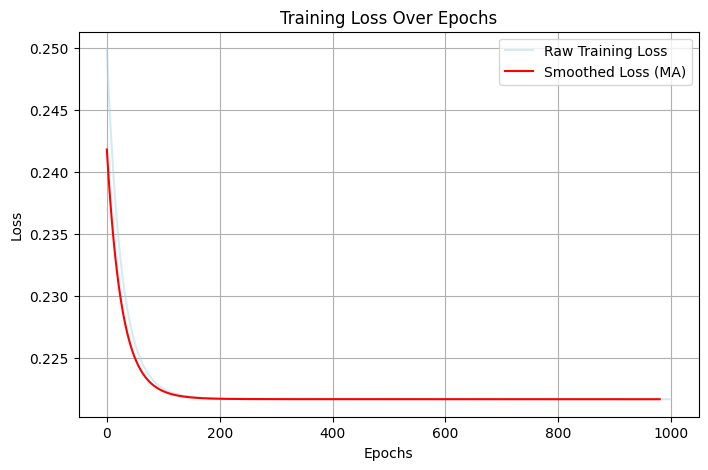

In [40]:
# Smooth the curve

window = 20
smooth_losses = np.convolve(losses, np.ones(window)/window, mode='valid')

plt.figure(figsize=(8,5))
plt.plot(losses, color="lightblue", alpha=0.5, label="Raw Training Loss")
plt.plot(smooth_losses, color="red", label="Smoothed Loss (MA)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()






In [41]:
# Test Predictions

print("Testing Predictions:")
print("Input [0,0,0] ->", nn.feedForward([0,0,0]))
print("Input [1,1,1] ->", nn.feedForward([1,1,1]))
print("Input [1,0,0] ->", nn.feedForward([1,0,0]))
print("Input [0,1,0] ->", nn.feedForward([0,1,0]))


Testing Predictions:
Input [0,0,0] -> [[0.30042606 0.35066128 0.35133639]]
Input [1,1,1] -> [[0.29851671 0.34917345 0.34988153]]
Input [1,0,0] -> [[0.29941215 0.34986968 0.35057136]]
Input [0,1,0] -> [[0.29992    0.35028099 0.35096492]]
